In [2]:
import os
import copy
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from utils import *

In [40]:
exp_name = 'clintox'
save_path = f'{exp_name}/'
data_map = {
            # 'RWNN_base_ada': f'{exp_name}_rws',
            # 'RWNN_mdlr_ada': f'{exp_name}_rws',
            # 'RWNN_rum_ada': f'{exp_name}_rws',
            # 'RWNN_crwl': f'{exp_name}_rws',
            # 'RWNN_LSTM_crwl_ada': f'{exp_name}_rws',
            'RWNN_TRSF_crwl_ada': f'{exp_name}_rws',
            # 'RWNN_ada': f'{exp_name}_rws',
            'RSNN_TRSF': f'{exp_name}_rws',
            # 'RSNN_LSTM': f'{exp_name}_rws'
            }

model_results = {key: [] for key in data_map.keys()}

for model in data_map.keys(): 
    # for m in [1, 4, 8, 16, 24]:
    for m in [1, 4, 8, 16]:
        # print(m)
        best_test_mean, best_test_std = get_results_m(save_path, data_map[model], model, m=m, total_ids=64, verbose=True, last_id=1)
        model_results[model].append((best_test_mean, best_test_std))

clintox_rws RWNN_TRSF_crwl_ada LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.590 +/ 0.063
clintox_rws RWNN_TRSF_crwl_ada LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.668 +/ 0.110
clintox_rws RWNN_TRSF_crwl_ada LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.692 +/ 0.115
clintox_rws RWNN_TRSF_crwl_ada LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.708 +/ 0.109
clintox_rws RSNN_TRSF LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.787 +/ 0.098
clintox_rws RSNN_TRSF LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.817 +/ 0.068
clintox_rws RSNN_TRSF LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.777 +/ 0.112
clintox_rws RSNN_TRSF LR 0.001 NL 2 Hid Dim 16 Reduce mean Test Performance: 0.841 +/ 0.037


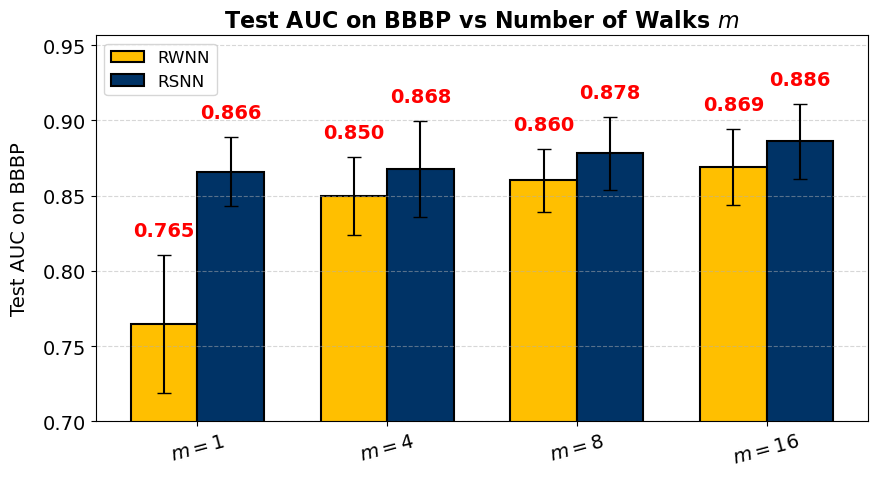

In [152]:
# # # Data
# bar_labels = ['$m=1$', '$m=4$', '$m=8$', '$m=16$', '$m=24$']
# means = {'RWNN': [model_results['RWNN_crwl'][i][0] for i in range(5)], 'RSNN': [model_results['RSNN'][i][0] for i in range(5)]}
# stds = {'RWNN': [model_results['RWNN_crwl'][i][1] for i in range(5)], 'RSNN': [model_results['RSNN'][i][1] for i in range(5)]}

# Data
bar_labels = ['$m=1$', '$m=4$', '$m=8$', '$m=16$']
means = {'RWNN': [model_results['RWNN_crwl_ada'][i][0] for i in range(4)], 'RSNN': [model_results['RSNN'][i][0] for i in range(4)]}
stds = {'RWNN': [model_results['RWNN_crwl_ada'][i][1] for i in range(4)], 'RSNN': [model_results['RSNN'][i][1] for i in range(4)]}

ylabel = f'Test AUC on {exp_name}'
title = f'Test AUC on {exp_name} vs Number of Walks $m$'

# Bar settings
bar_width = 0.35  # Width of the bars
x = np.arange(len(bar_labels))  # X positions for groups

# Define custom colors: RWNN in yellow, RSNN in blue
colors = {'RWNN': '#FFBF00', 'RSNN': '#003366'}

# Set up the figure
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(9, 5))

# Plot each group's bars
bars_dict = {}
for i, key in enumerate(means.keys()):
    bars = ax.bar(x + i * bar_width, means[key], yerr=stds[key], width=bar_width,
                  label=key, capsize=5, color=colors[key], edgecolor='black', linewidth=1.5)
    bars_dict[key] = bars  # Store bars for annotation

# Annotate bars with mean values
for key, bars in bars_dict.items():
    for bar, mean, std in zip(bars, means[key], stds[key]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + std + 0.01, f'{mean:.3f}', 
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='red')

# X-axis labels
ax.set_xticks(x + bar_width / 2)  # Centering group labels
ax.set_xticklabels(bar_labels, rotation=15, ha='center')

# Labels and title
ax.set_ylabel(ylabel, fontsize=14, labelpad=10)
ax.set_title(title, fontsize=16, fontweight='bold')

# Set y-axis limits
plt.ylim(0.70)

# Grid and legend
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.legend(fontsize=12, loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [41]:
results_print = {"clintox": [], "sider": [], "bace": [], "BBBP": [], 'tox21_7': [], 'toxcast': []}

# results_print = {"clintox": [], "sider": [], "toxcast": [], 'tox21_7': [], "BBBP": [], "bace": []}
# results_print = {"EC_eps5.0": [], "EC_sub_eps5.0": [], "EC_mec_eps5.0": [], "SCOP_CL_eps5.0": []}
# data_names = ["EC_eps5.0", "EC_eps5.0", "EC_eps5.0", "SCOP_CL_eps5.0"]

for i, exp_name in enumerate(results_print.keys()): 
    save_path = f'{exp_name}/'
    data_map = {
                'RWNN_TRSF_crwl_ada': f'{exp_name}_rws',
                'RWNN_LSTM_crwl_ada': f'{exp_name}_rws',
                'RWNN_crwl_ada': f'{exp_name}_rws',
                'RSNN_TRSF': f'{exp_name}_rws',
                'RSNN_LSTM': f'{exp_name}_rws',
                'RSNN': f'{exp_name}_rws'
    }
    
    for m in [1, 4, 8, 16]: 
        for model in data_map.keys(): 
            best_test_mean, best_test_std = get_results_m(save_path, data_map[model], model, m=m, total_ids=64, verbose=False, last_id=1)
            if best_test_mean != None: 
                results_print[exp_name].append(f"{best_test_mean:.3f} \u00B1 {best_test_std:.3f}")
            else: 
                results_print[exp_name].append(f"XXX \u00B1 XXX")

names_print = []
for m in [1, 4, 8, 16]: 
    for model in data_map.keys(): 
        names_print.append(f'{model} {m}')

rows_mapping = {i: names_print[i] for i in range(len(names_print))}
results_df = pd.DataFrame.from_dict(results_print)
results_df = results_df.rename(index=rows_mapping)
# results_df
print(results_df.style.to_latex())

\begin{tabular}{lllllll}
 & clintox & sider & bace & BBBP & tox21_7 & toxcast \\
RWNN_TRSF_crwl_ada 1 & 0.590 ± 0.063 & 0.613 ± 0.030 & 0.686 ± 0.026 & 0.745 ± 0.034 & 0.701 ± 0.026 & 0.708 ± 0.029 \\
RWNN_LSTM_crwl_ada 1 & 0.682 ± 0.075 & 0.629 ± 0.028 & 0.665 ± 0.031 & 0.777 ± 0.047 & 0.720 ± 0.025 & 0.714 ± 0.025 \\
RWNN_crwl_ada 1 & 0.696 ± 0.032 & 0.635 ± 0.033 & 0.637 ± 0.040 & 0.765 ± 0.046 & 0.715 ± 0.024 & 0.723 ± 0.026 \\
RSNN_TRSF 1 & 0.787 ± 0.098 & 0.669 ± 0.029 & 0.771 ± 0.037 & 0.848 ± 0.035 & 0.769 ± 0.016 & 0.747 ± 0.028 \\
RSNN_LSTM 1 & 0.866 ± 0.025 & 0.665 ± 0.026 & 0.784 ± 0.028 & 0.869 ± 0.019 & 0.798 ± 0.017 & 0.763 ± 0.020 \\
RSNN 1 & 0.874 ± 0.031 & 0.665 ± 0.020 & 0.800 ± 0.024 & 0.866 ± 0.023 & 0.801 ± 0.017 & 0.763 ± 0.026 \\
RWNN_TRSF_crwl_ada 4 & 0.668 ± 0.110 & 0.654 ± 0.025 & 0.729 ± 0.021 & 0.821 ± 0.031 & 0.748 ± 0.021 & 0.728 ± 0.034 \\
RWNN_LSTM_crwl_ada 4 & 0.818 ± 0.027 & 0.661 ± 0.019 & 0.731 ± 0.027 & 0.849 ± 0.029 & 0.777 ± 0.017 & 0.746 ± 0.026